In [1]:
import tensorflow as tf
import os
import numpy as np
import time
import matplotlib.pyplot as plt 

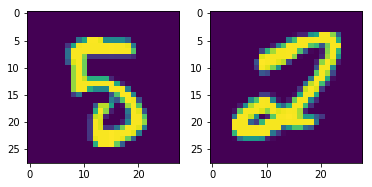

merged label : 5
 label : 2


In [24]:
i = np.random.randint(60000)
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(merged['train_x'][i,:,:,:].reshape(28,28))
f.add_subplot(1,2, 2)
plt.imshow(mnist['train_x'][i,:,:,:].reshape(28,28))
plt.show(block=True)
print("merged label : {}".format(merged['train_y'][i]))
print(" label : {}".format(mnist['train_y'][i]))

In [9]:
from math import ceil, floor
IMAGE_SIZE = 28
channels = 1
def get_translate_parameters(index):
    if index == 0: # Translate left 20 percent
        offset = np.array([0.0, 0.2], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        w_start = 0
        w_end = int(ceil(0.8 * IMAGE_SIZE))
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 1: # Translate right 20 percent
        offset = np.array([0.0, -0.2], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        w_start = int(floor((1 - 0.8) * IMAGE_SIZE))
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 2: # Translate top 20 percent
        offset = np.array([0.2, 0.0], dtype = np.float32)
        size = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = int(ceil(0.8 * IMAGE_SIZE)) 
    else: # Translate bottom 20 percent
        offset = np.array([-0.2, 0.0], dtype = np.float32)
        size = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = int(floor((1 - 0.8) * IMAGE_SIZE))
        h_end = IMAGE_SIZE 
        
    return offset, size, w_start, w_end, h_start, h_end

def translate_images(X_imgs):
    offsets = np.zeros((len(X_imgs), 2), dtype = np.float32)
    n_translations = 4
    X_translated_arr = []
    
    tf.reset_default_graph()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(n_translations):
            X_translated = np.zeros((len(X_imgs), IMAGE_SIZE, IMAGE_SIZE, channels), dtype = np.float32)
            X_translated.fill(0.0) # Filling background color
            base_offset, size, w_start, w_end, h_start, h_end = get_translate_parameters(i)
            offsets[:, :] = base_offset 
            glimpses = tf.image.extract_glimpse(X_imgs, size, offsets)
            
            glimpses = sess.run(glimpses)
            X_translated[:, h_start: h_start + size[0], w_start: w_start + size[1], :] = glimpses
            X_translated_arr.extend(X_translated)
    X_translated_arr = np.array(X_translated_arr, dtype = np.float32)
    return X_translated_arr

### load images 

In [3]:
from prep import mnist_funct
mnist = mnist_funct()

In [5]:
mnist['train_x'].shape

(60000, 28, 28, 1)

In [123]:
np.concatenate([mnist['train_x'],translated_imgs],axis=0).reshape((-1,28,28,1)).shape

(300000, 28, 28, 1)

In [122]:
np.concatenate([mnist['train_x'],mnist['train_x']],axis=0).shape

(120000, 28, 28, 1)

In [120]:
translated_imgs.shape

(240000, 28, 28, 1)

In [24]:
translated_imgs = translate_images(mnist['train_x'])
print(translated_imgs.shape)

(240000, 28, 28, 1)


In [124]:
translated_labels = np.concatenate([mnist['train_y'] for _ in range(4)],axis=0)

In [125]:
translated_labels = translated_labels.reshape((-1,))

In [126]:
translated_labels.shape

(240000,)

In [127]:
translated_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [138]:
n = np.random.randint(60000)
print(n)
if translated_labels[n]==translated_labels[n+60000]:
    print('ok')
else:
    print('nokay')

55899
ok


In [110]:
augmented_data = dict()
augmented_data['train_x'] = translated_imgs
augmented_data['train_y'] = translated_labels
np.save('augment.npy',augmented_data)